In [1]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.7/395.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=15bbd17de1c63747a8692cc77ffd2f8d23f0d474bedfaf889021ee6471ee794b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
file_path = 'MusicCaps_with_Energy_Ratings.csv'
df = pd.read_csv(file_path, comment='#', sep=',', header=0)
df.head()

,ytid,start_s,end_s,audioset_positive_labels,aspect_list,caption,author_id,is_balanced_subset,is_audioset_eval,energy_level
0,-0Gj8-vB1q4,30,40,"/m/0140xf,/m/02cjck,/m/04rlf","['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,4,False,True,1
1,-0SdAVK79lg,30,40,"/m/0155w,/m/01lyv,/m/0342h,/m/042v_gx,/m/04rlf...","['guitar song', 'piano backing', 'simple percu...",This song features an electric guitar as the m...,0,False,False,1
2,-0vPFx-wRRI,30,40,"/m/025_jnm,/m/04rlf","['amateur recording', 'finger snipping', 'male...",a male voice is singing a melody with changing...,6,False,True,1
3,-0xzrMun0Rs,30,40,"/m/01g90h,/m/04rlf","['backing track', 'jazzy', 'digital drums', 'p...",This song contains digital drums playing a sim...,6,False,True,1
4,-1LrH01Ei1w,30,40,"/m/02p0sh1,/m/04rlf","['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...,0,False,False,3


In [4]:
df['caption'][1]

'This song features an electric guitar as the main instrument. The guitar plays a descending run in the beginning then plays an arpeggiated chord followed by a double stop hammer on to a higher note and a descending slide followed by a descending chord run. The percussion plays a simple beat using rim shots. The percussion plays in common time. The bass plays only one note on the first count of each bar. The piano plays backing chords. There are no voices in this song. The mood of this song is relaxing. This song can be played in a coffee shop.'

In [5]:
for i in range(10):
  print(df['aspect_list'][i] )
  print(df['energy_level'][i])


['low quality', 'sustained strings melody', 'soft female vocal', 'mellow piano melody', 'sad', 'soulful', 'ballad']
1
['guitar song', 'piano backing', 'simple percussion', 'relaxing melody', 'slow tempo', 'bass', 'country feel', 'instrumental', 'no voice']
1
['amateur recording', 'finger snipping', 'male mid range voice singing', 'reverb']
1
['backing track', 'jazzy', 'digital drums', 'piano', 'e-bass', 'trumpet', 'acoustic guitar', 'digital keyboard song', 'medium tempo']
1
['rubab instrument', 'repetitive melody on different octaves', 'no other instruments', 'plucked string instrument', 'no voice', 'instrumental', 'fast tempo']
3
['instrumental', 'white noise', 'female vocalisation', 'three unrelated tracks', 'electric guitar harmony', 'bass guitar', 'keyboard harmony', 'female lead vocalisation', 'keyboard harmony', 'slick drumming', 'boomy bass drops', 'male voice backup vocalisation']
1
['live performance', 'poor audio quality', 'ambient noises', 'school dance program', 'crowd noi

In [6]:
df.shape

(5521, 10)

In [7]:
df.columns

Index(['ytid', 'start_s', 'end_s', 'audioset_positive_labels', 'aspect_list',
       'caption', 'author_id', 'is_balanced_subset', 'is_audioset_eval',
       'energy_level'],
      dtype='object')

In [8]:
df.describe()

,start_s,end_s,author_id,energy_level
count,5521.000000,5521.000000,5521.000000,5521.000000
mean,89.100525,99.100525,4.867415,1.678138
std,110.234627,110.234627,2.835302,0.844317
min,0.000000,10.000000,0.000000,1.000000
25%,30.000000,40.000000,3.000000,1.000000
50%,30.000000,40.000000,4.000000,1.000000
75%,110.000000,120.000000,7.000000,2.000000
max,590.000000,600.000000,9.000000,3.000000


##Preprocessing the Captions

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    return " ".join(tokens)

df["clean_caption"] = df["caption"].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Sentiment Analysis of Captions**

In [10]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["clean_caption"].apply(lambda x: sia.polarity_scores(x)["compound"])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**Topic Modeling (LDA) for Musical Themes**

In [11]:
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df["clean_caption"])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(X)

**Lyrics Complexity Analysis**

In [12]:
df["word_count"] = df["clean_caption"].apply(lambda x: len(x.split()))
df["avg_word_length"] = df["clean_caption"].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

sentiment_threshold = 0.5
word_count_threshold = 10
avg_word_length_threshold = 5

# Create the depth_label
df["depth_label"] = ((df["sentiment"] > sentiment_threshold) &
                         (df["word_count"] > word_count_threshold) &
                         (df["avg_word_length"] > avg_word_length_threshold)).astype(int)

**Build a Lyrics Depth Scoring System**

In [13]:
features = df[["sentiment", "word_count", "avg_word_length"]]
labels = df["depth_label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

##**EDA**

In [14]:
text_caption = " ".join(df['caption'].dropna())
text_aspect_list = " ".join(df['aspect_list'].dropna())

# Create word clouds
wordcloud_caption = WordCloud(width=800, height=400, background_color='white').generate(text_caption)
wordcloud_aspect_list = WordCloud(width=800, height=400, background_color='white').generate(text_aspect_list)


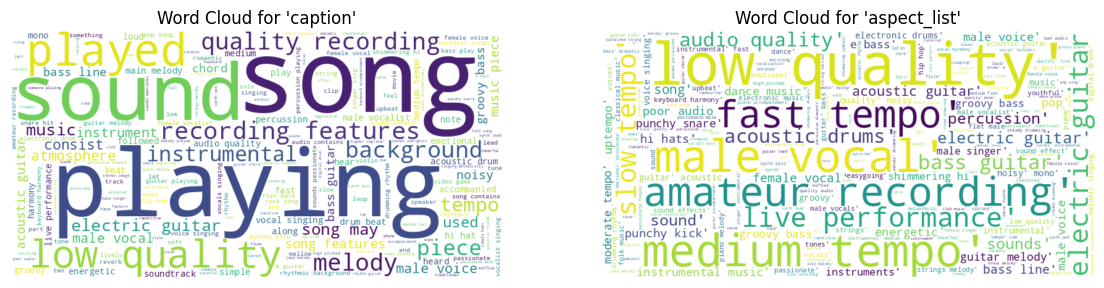

In [15]:
# word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_caption, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 'caption'")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_aspect_list, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 'aspect_list'")

plt.show()

- Summary statistics
- Missing values analysis
- Distribution of numerical and categorical features
- Correlation analysis

In [16]:
profile = ProfileReport(df, title="MusicCaps Dataset EDA", explorative=True)
profile.to_file("musiccaps_eda_report.html")

print("EDA report saved as 'musiccaps_eda_report.html'. Open it in a browser to explore.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00, 10.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report saved as 'musiccaps_eda_report.html'. Open it in a browser to explore.


**Statistic for numeric values**

In [17]:
df.describe()

,start_s,end_s,author_id,energy_level,sentiment,word_count,avg_word_length,depth_label
count,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000
mean,89.100525,99.100525,4.867415,1.678138,0.441931,28.834994,6.327182,0.575439
std,110.234627,110.234627,2.835302,0.844317,0.470521,9.486649,0.489442,0.494321
min,0.000000,10.000000,0.000000,1.000000,-0.974400,3.000000,4.700000,0.000000
25%,30.000000,40.000000,3.000000,1.000000,0.202300,22.000000,5.975000,0.000000
50%,30.000000,40.000000,4.000000,1.000000,0.599400,28.000000,6.304348,1.000000
75%,110.000000,120.000000,7.000000,2.000000,0.817600,35.000000,6.640000,1.000000
max,590.000000,600.000000,9.000000,3.000000,0.990600,80.000000,8.818182,1.000000


In [18]:
df.isnull().sum()

,0
ytid,0
start_s,0
end_s,0
audioset_positive_labels,0
aspect_list,0
caption,0
author_id,0
is_balanced_subset,0
is_audioset_eval,0
energy_level,0


In [19]:
# count unique values in categorical columns
df.select_dtypes(include=['object']).nunique()

,0
ytid,5521
audioset_positive_labels,2387
aspect_list,5518
caption,5521
clean_caption,5521


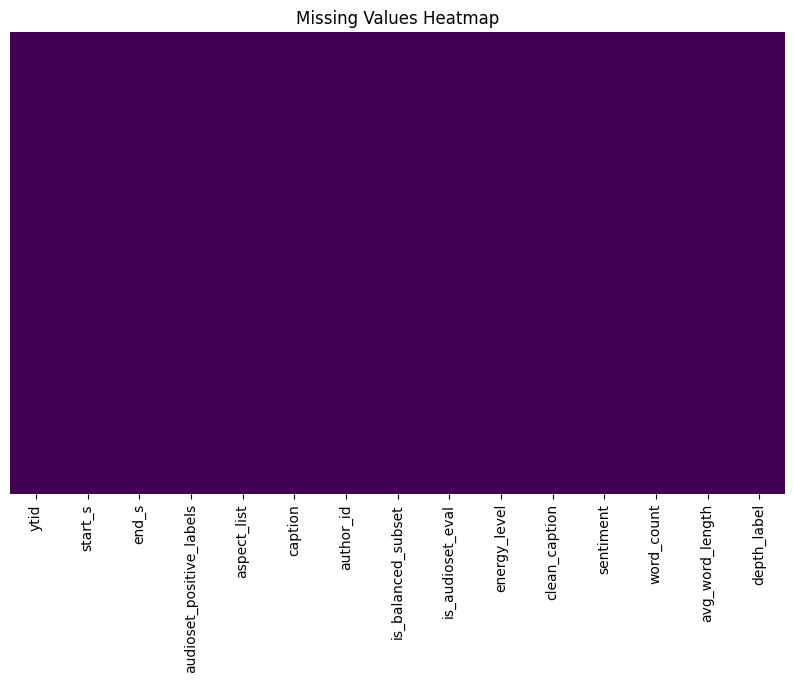

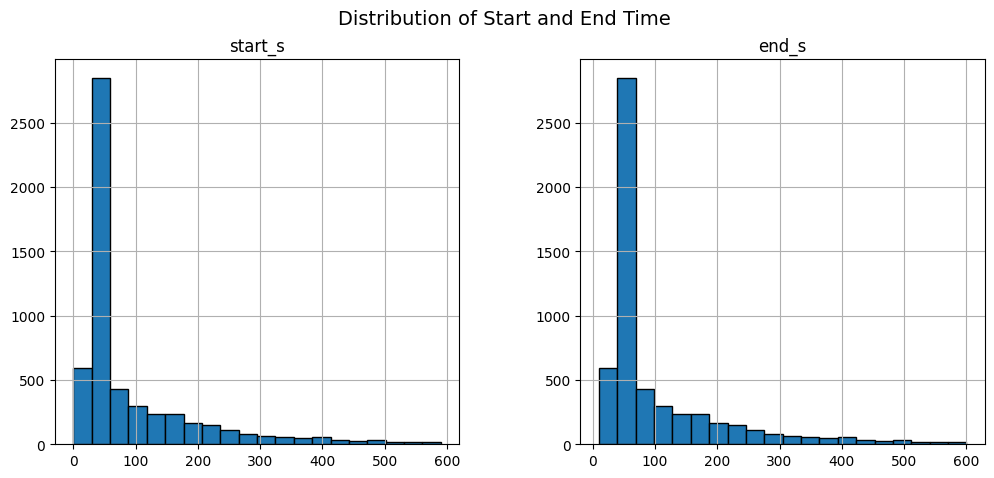

In [20]:
# visualizing m v
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# distribution for numerical columns
df[['start_s', 'end_s']].hist(bins=20, figsize=(12, 5), edgecolor='black')
plt.suptitle("Distribution of Start and End Time", fontsize=14)
plt.show()


In [21]:
df_1 = pd.read_csv('MusicCaps_with_Energy_Ratings.csv')
df_1

,ytid,start_s,end_s,audioset_positive_labels,aspect_list,caption,author_id,is_balanced_subset,is_audioset_eval,energy_level
0,-0Gj8-vB1q4,30,40,"/m/0140xf,/m/02cjck,/m/04rlf","['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,4,False,True,1
1,-0SdAVK79lg,30,40,"/m/0155w,/m/01lyv,/m/0342h,/m/042v_gx,/m/04rlf...","['guitar song', 'piano backing', 'simple percu...",This song features an electric guitar as the m...,0,False,False,1
2,-0vPFx-wRRI,30,40,"/m/025_jnm,/m/04rlf","['amateur recording', 'finger snipping', 'male...",a male voice is singing a melody with changing...,6,False,True,1
3,-0xzrMun0Rs,30,40,"/m/01g90h,/m/04rlf","['backing track', 'jazzy', 'digital drums', 'p...",This song contains digital drums playing a sim...,6,False,True,1
4,-1LrH01Ei1w,30,40,"/m/02p0sh1,/m/04rlf","['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...,0,False,False,3
...,...,...,...,...,...,...,...,...,...,...
5516,zw5dkiklbhE,15,25,"/m/01sm1g,/m/0l14md","['amateur recording', 'percussion', 'wooden bo...",This audio contains someone playing a wooden b...,6,False,False,1
5517,zwfo7wnXdjs,30,40,"/m/02p0sh1,/m/04rlf,/m/06j64v","['instrumental music', 'arabic music', 'genera...",The song is an instrumental. The song is mediu...,1,True,True,1
5518,zx_vcwOsDO4,50,60,"/m/01glhc,/m/02sgy,/m/0342h,/m/03lty,/m/04rlf,...","['instrumental', 'no voice', 'electric guitar'...",The rock music is purely instrumental and feat...,2,True,True,1
5519,zyXa2tdBTGc,30,40,"/m/04rlf,/t/dd00034","['instrumental music', 'gospel music', 'strong...",The song is an instrumental. The song is slow ...,1,False,False,2


In [22]:
df_1['energy_level'].value_counts()

,count
energy_level,
1,3142
3,1365
2,1014


Step 1) Inspect different dataframes with different energy levels, build word clouds for them

Step 2 ) Build a ML model.  The aspect list length is different for each
sample.   So if we build an ML model, we are going to have to consider different lengths for the inputs .  Combine the list into one sentence, use tfidf or other vectorizers,  train a classifier for energy level (random forest classifier, naive bayes... )


In [23]:
df_1['aspect_list'][10]   #

"['brass', 'double bass', 'strings', 'instrumental', 'no voice', 'percussion']"

**Generate word clouds for each energy level**

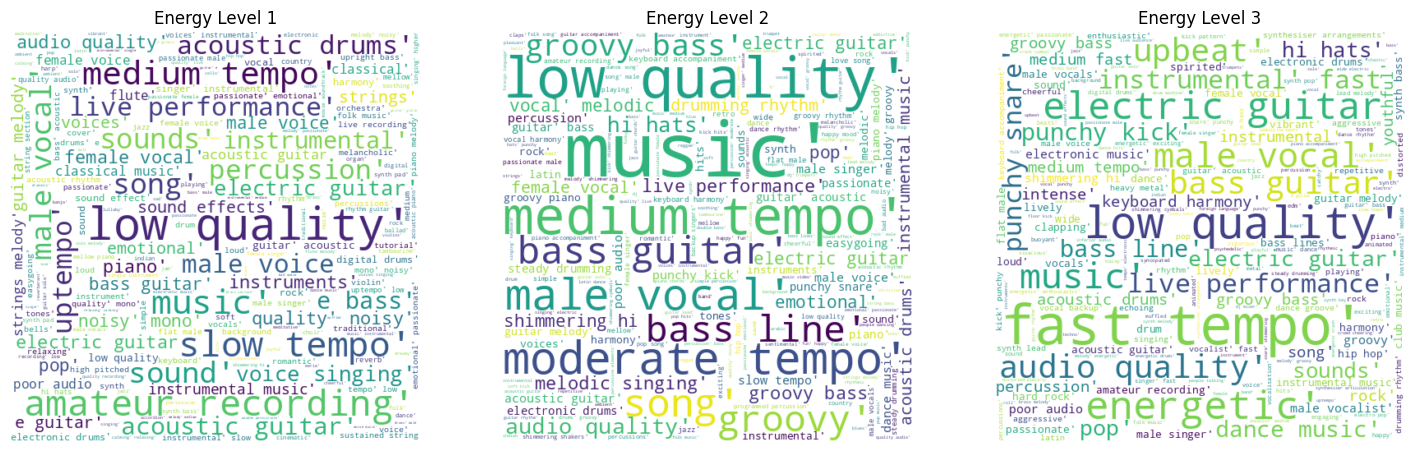

In [24]:
df_energy = df_1[df_1['energy_level'].isin([1,2,3])]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, level in enumerate([1, 2, 3]):
    text = " ".join(df_energy[df_energy['energy_level'] == level]['aspect_list'].dropna().astype(str))

    wordcloud = WordCloud(width=500, height=500, background_color='white').generate(text)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis("off")
    axes[idx].set_title(f"Energy Level {level}")

plt.show()

**TF-IDF and Random Forest for Energy level Prediction**  
Accuracy scores:
- Energy Level 1: 99%
- Energy Level 2: 96%
- Energy Level 3: 98%

In [25]:
# Drop NaN values from aspect_list
df_filter = df_1.dropna(subset=['aspect_list'])

# Prepare text data and labels
X = df_filter['aspect_list'].astype(str)  # Convert aspects to string for vectorization
y = df_filter['energy_level']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [27]:
# TF-IDF vectorizer to convert text data into numerical format
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_val_tfidf)

# classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       503
           2       0.97      0.96      0.97       162
           3       0.98      0.98      0.98       219

    accuracy                           0.98       884
   macro avg       0.98      0.98      0.98       884
weighted avg       0.98      0.98      0.98       884



**Support Vector Machine**

In [29]:
# SVM model
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_val_tfidf)

# classification report for SVM
print("SVM Classification Report:\n", classification_report(y_val, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       503
           2       0.96      0.96      0.96       162
           3       1.00      0.96      0.98       219

    accuracy                           0.98       884
   macro avg       0.98      0.97      0.98       884
weighted avg       0.98      0.98      0.98       884



**Logistic Regression model**

In [30]:
 # Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=500, random_state=42)
logreg_classifier.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_classifier.predict(X_val_tfidf)

# classification report for Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_logreg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.99      0.96       503
           2       0.91      0.86      0.88       162
           3       0.98      0.87      0.92       219

    accuracy                           0.94       884
   macro avg       0.94      0.91      0.92       884
weighted avg       0.94      0.94      0.94       884



**Feature analysis for RF**

<ipython-input-28-53d1340dfd80>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")


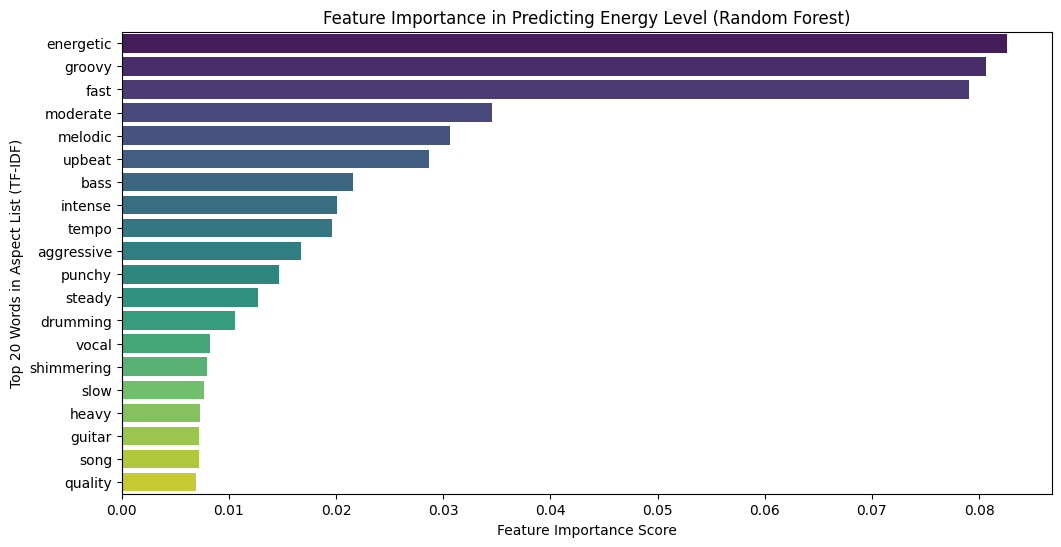

In [28]:
feature_importance = classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# (Top 20 features)
sorted_idx = np.argsort(feature_importance)[::-1][:20]

# feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Top 20 Words in Aspect List (TF-IDF)")
plt.title("Feature Importance in Predicting Energy Level (Random Forest)")
plt.show()

**Accuracy test score with the Best model LR**

In [35]:
# Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=500, random_state=42)
logreg_classifier.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)
y_pred_logreg = logreg_classifier.predict(X_test_tfidf)

# classification report for Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.95       629
           2       0.96      0.82      0.88       203
           3       0.98      0.89      0.93       273

    accuracy                           0.94      1105
   macro avg       0.95      0.90      0.92      1105
weighted avg       0.94      0.94      0.94      1105



**Hyperparameter tuning for Random Forest using Grid Search**

In [32]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# best parameters from Grid Search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# display best hyperparameters and accuracy
best_params, best_score

({'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200},
 np.float64(0.979614945770159))

**Feature importances with LogisticRegression**

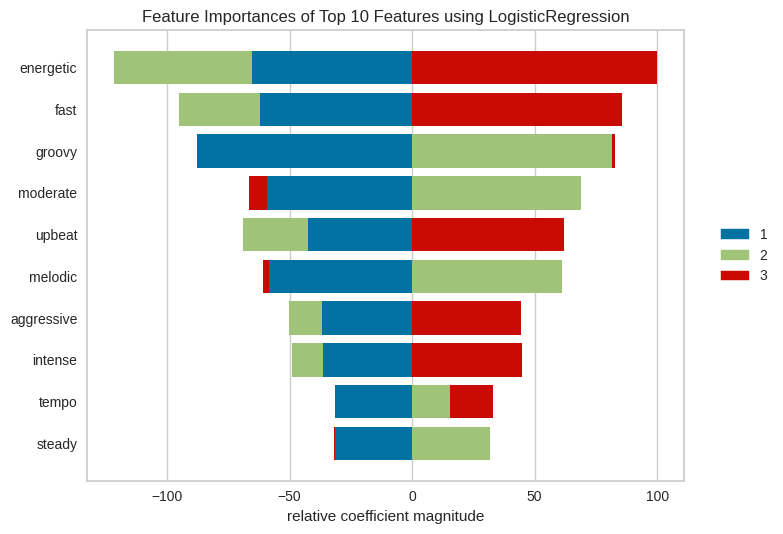

<Axes: title={'center': 'Feature Importances of Top 10 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [33]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from yellowbrick.model_selection import FeatureImportances


model = LogisticRegression( solver="liblinear")
viz = FeatureImportances(model, labels= feature_names, topn=10, stack=True)
viz.fit(X_train_tfidf, y_train)
viz.show()
